<a href="https://colab.research.google.com/github/Mainak1792/Kaggle_competitions/blob/main/Custom_food_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import The dependencies

In [12]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

Data Augmentaiton

In [6]:
TRAINING_DIR = "/content/drive/MyDrive/crop_Vegi/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/crop_Vegi/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 3914 images belonging to 17 classes.
Found 1065 images belonging to 17 classes.


I am using Three models to classify:
1. 4-Layer Custom CNN 
2. INCEPTION v3
3. mOBILE NET V
4. RESNET 50


[However, Restnet is a heavy model and training on such low data leads to very high training accuracy and very low validation accuracy ]

cUSTOM cnn Architecture

In [7]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])


In [8]:

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 387s 18s/step - loss: 2.6858 - accuracy: 0.1803 - val_loss: 2.1899 - val_accuracy: 0.2552
Epoch 2/25
20/20 [==============================] - 284s 14s/step - loss: 2.0065 - accuracy: 0.2945 - val_loss: 1.4343 - val_accuracy: 0.4688
Epoch 3/25
20/20 [==============================] - 201s 10s/step - loss: 1.6605 - accuracy: 0.4430 - val_loss: 1.1071 - val_accuracy: 0.6875
Epoch 4/25
20/20 [==============================] - ETA: 0s - loss: 1.3735 - accuracy: 0.5514

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/20 [==============================] - 147s 7s/step - loss: 1.3735 - accuracy: 0.5514 - val_loss: 1.1326 - val_accuracy: 0.6615
Epoch 5/25
20/20 [==============================] - 114s 6s/step - loss: 1.0280 - accuracy: 0.6687 - val_loss: 2.1209 - val_accuracy: 0.6510
Epoch 6/25
20/20 [==============================] - 74s 4s/step - loss: 0.7775 - accuracy: 0.7423 - val_loss: 0.8739 - val_accuracy: 0.8021
Epoch 7/25
20/20 [==============================] - 57s 3s/step - loss: 0.6727 - accuracy: 0.7992 - val_loss: 1.7370 - val_accuracy: 0.7396
Epoch 8/25
20/20 [==============================] - 50s 3s/step - loss: 1.0758 - accuracy: 0.7906 - val_loss: 1.2238 - val_accuracy: 0.7969
Epoch 9/25
20/20 [==============================] - 38s 2s/step - loss: 0.5492 - accuracy: 0.8359 - val_loss: 1.5108 - val_accuracy: 0.8125
Epoch 10/25
20/20 [==============================] - 33s 2s/step - loss: 0.6643 - accuracy: 0.7969 - val_loss: 2.8041 - val_accuracy: 0.7396
Epoch 11/25
20/20 [=========

RESNET+MOBILE_NET+INCEPTION

UNCOMMENT AND USE

In [18]:
# from tensorflow.keras.applications.resnet50 import ResNet50
# resnet = tf.keras.applications.resnet.ResNet50(input_shape=(150,150,3),
                                              #  include_top=False,
                                              #  weights='imagenet')
# x = tf.keras.layers.GlobalAveragePooling2D()(resnet.output)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(1024, activation="relu")(x)
# x = tf.keras.layers.Dense(512, activation="relu")(x)
# x = tf.keras.layers.Dense(17, activation="softmax", name="classification")(x)

# inception = InceptionV3(weights='imagenet', include_top=False)
inception = tf.keras.applications.MobileNet(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(17,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit(train_generator,
                    steps_per_epoch = 20,
                    validation_data=validation_generator,
                    validation_steps= 3,
                    epochs=25,
                    verbose=1)

# model.save('model_trained_3class.hdf5')

17227776/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
 6/20 [========>.....................] - ETA: 9s - loss: 2.2361 - accuracy: 0.4297

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 24s 1s/step - loss: 1.1756 - accuracy: 0.7129 - val_loss: 5.3650 - val_accuracy: 0.4323
Epoch 2/25
20/20 [==============================] - 22s 1s/step - loss: 0.3995 - accuracy: 0.9250 - val_loss: 5.4326 - val_accuracy: 0.6250
Epoch 3/25
 7/20 [=========>....................] - ETA: 10s - loss: 0.2927 - accuracy: 0.9509

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/20 [==============================] - 21s 1s/step - loss: 0.3288 - accuracy: 0.9454 - val_loss: 4.1280 - val_accuracy: 0.5260
Epoch 4/25
20/20 [==============================] - 20s 987ms/step - loss: 0.2677 - accuracy: 0.9602 - val_loss: 4.2850 - val_accuracy: 0.5104
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.2492 - accuracy: 0.9625 - val_loss: 1.9996 - val_accuracy: 0.6094
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.2163 - accuracy: 0.9703 - val_loss: 2.0242 - val_accuracy: 0.5625
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 0.2180 - accuracy: 0.9742 - val_loss: 1.4381 - val_accuracy: 0.7292
Epoch 8/25
20/20 [==============================] - 22s 1s/step - loss: 0.1971 - accuracy: 0.9734 - val_loss: 2.3690 - val_accuracy: 0.6250
Epoch 9/25
20/20 [==============================] - 21s 1s/step - loss: 0.2030 - accuracy: 0.9723 - val_loss: 1.2305 - val_accuracy: 0.7552
Epoch 10/25
20/20 [=========

In [17]:
model.save('cfv_inception.hdf5')

In [9]:
model.save("cfv.h5")

Result Analysis

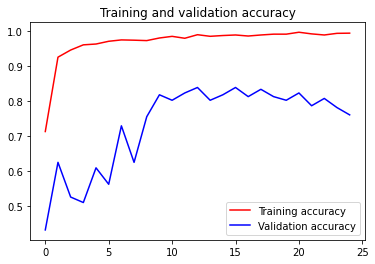

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [21]:
from tensorflow.python import keras
import tensorflow

modelnew = keras.models.load_model('/content/cfv.h5')
converter=tensorflow.lite.TFLiteConverter.from_keras_model(modelnew)
tflite_model = converter.convert()
open("cfv_tf.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpi5yhzdr1/assets


13927360

In [22]:
from tensorflow.python import keras
import tensorflow

modelnew = keras.models.load_model('/content/cfv_inception.hdf5')
converter=tensorflow.lite.TFLiteConverter.from_keras_model(modelnew)
tflite_model = converter.convert()
open("cfv_inception_tf.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpczs7pbq0/assets


INFO:tensorflow:Assets written to: /tmp/tmpczs7pbq0/assets


88187360